# Predicting Breast Cancer - Logistic Regression





# 1. O dado

### Attribute Information:

* **id**
* **diagnosis**: M = maligno, B = benigno

*Colunas 3 a 32*

Dez características de valor real são computadas para cada núcleo celular:

* **radius**: distâncias do centro aos pontos do perímetro
* **texture**: desvio padrão dos valores da escala de cinza
* **perimeter**
* **area**
* **smoothness**: variação local nos comprimentos dos raios
* **compactness**: perímetro^2 / área - 1,0
* **concavity**: severidade das porções côncavas do contorno
* **concave points**: número de porções côncavas do contorno
* **symmetry**
* **fractal dimension**: "aproximação da costa" - 1

#### A média, o erro padrão e o "pior" ou maior (média dos três maiores valores) dessas features foram calculados para cada imagem, resultando em 30 features. Por exemplo, a coluna 3 é o raio médio, a coluna 13 é o erro padrão do raio , o campo 23 é o pior raio.

#### Ou seja, cada característica terá valores para a média, erro padrão e "pior" valor.
---

In [3]:
# import dependencies
# data cleaning and manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [4]:
# read in the data and check the first 5 rows
# it will be defined the dataframe's first column as an index column.

df = pd.read_csv('../data/data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

Parece que nossos dados não contêm nenhum valor ausente, exceto nossa coluna suspeita UNNAMED: 32, que está cheia de valores ausentes. Vamos em frente e remover esta coluna completamente. Depois disso, vamos verificar o tipo de dados de cada coluna.

In [6]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1) # O parâmetro axis=1 especifica que a operação deve ser feita ao longo das colunas. Se fosse axis=0, a operação seria ao longo das linhas (ou seja, removendo uma linha).

In [7]:
# check the data type of each column
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Nossa variável de resposta, diagnóstico, é categórica e possui duas classes, 'B' (benigno) e 'M' (maligno). Todas as variáveis explicativas são numéricas, então podemos pular a conversão de tipo de dados. Lembrando que se necessário, deveriamos fazer o encoding dos dados categóricos (passar para variável dummy)

Relembrando, **variáveis dummy** são um tipo de variável que se utiliza em análises estatísticas e modelos de machine learning para representar variáveis categóricas. São essencialmente variáveis binárias (0 ou 1) que indicam a presença ou ausência de uma categoria específica. Esse processo de transformação é conhecido como **one-hot encoding** e é particularmente útil porque muitos algoritmos de machine learning e métodos estatísticos requerem que todas as entradas sejam numéricas.

Vamos agora dar uma olhada mais de perto em nossa variável resposta, já que ela é o foco principal de nossa análise. Começamos verificando a distribuição de suas classes.

<Axes: xlabel='diagnosis', ylabel='count'>

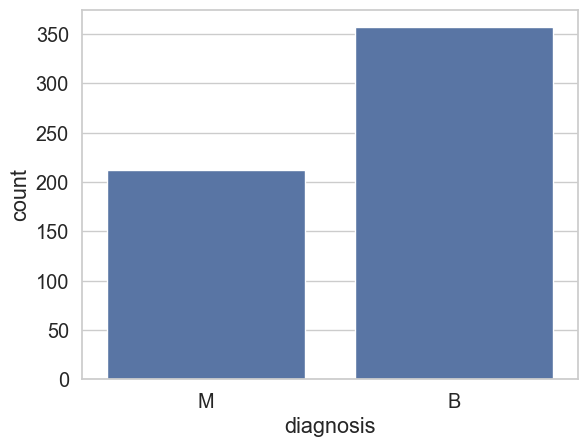

In [8]:
# visualize distribution of classes
sns.countplot(x = df['diagnosis'])



In [9]:
#counting the results for each diagnosis

df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
#calculating the percentage of these results

benign_percentage = df[df['diagnosis']=='B'].shape[0]/df.shape[0]*100
malignant_percentage = df[df['diagnosis']=='M'].shape[0]/df.shape[0]*100

print(f'The percentage of:\n'
      f'Malignant: {malignant_percentage:.2f}%\n'
      f'Benign: {benign_percentage:.2f}%\n'
      )


The percentage of:
Malignant: 37.26%
Benign: 62.74%



Das 569 observações, 357 (ou 62,7%) foram rotuladas como benignas, enquanto as 212 restantes (ou 37,3%) foram rotuladas como malignas.

Embora nosso conjunto de dados tenha 30 colunas excluindo as colunas de id e diagnóstico, elas estão todas muito próximas, pois todas contêm informações sobre os mesmos 10 atributos-chave, mas diferem apenas em termos de suas perspectivas (ou seja, a média, erros padrão, e a média dos três maiores valores denotados como "pior").

Nesse sentido, poderíamos tentar extrair alguns insights rápidos analisando os dados em apenas uma das três perspectivas. Por exemplo, poderíamos optar por verificar a relação entre os 10 atributos-chave e a variável de diagnóstico escolhendo apenas as colunas "médias".

Vamos verificar rapidamente quaisquer padrões interessantes entre nossas 10 colunas "médias" e a variável de resposta, gerando uma matriz de gráfico de dispersão conforme mostrado abaixo:

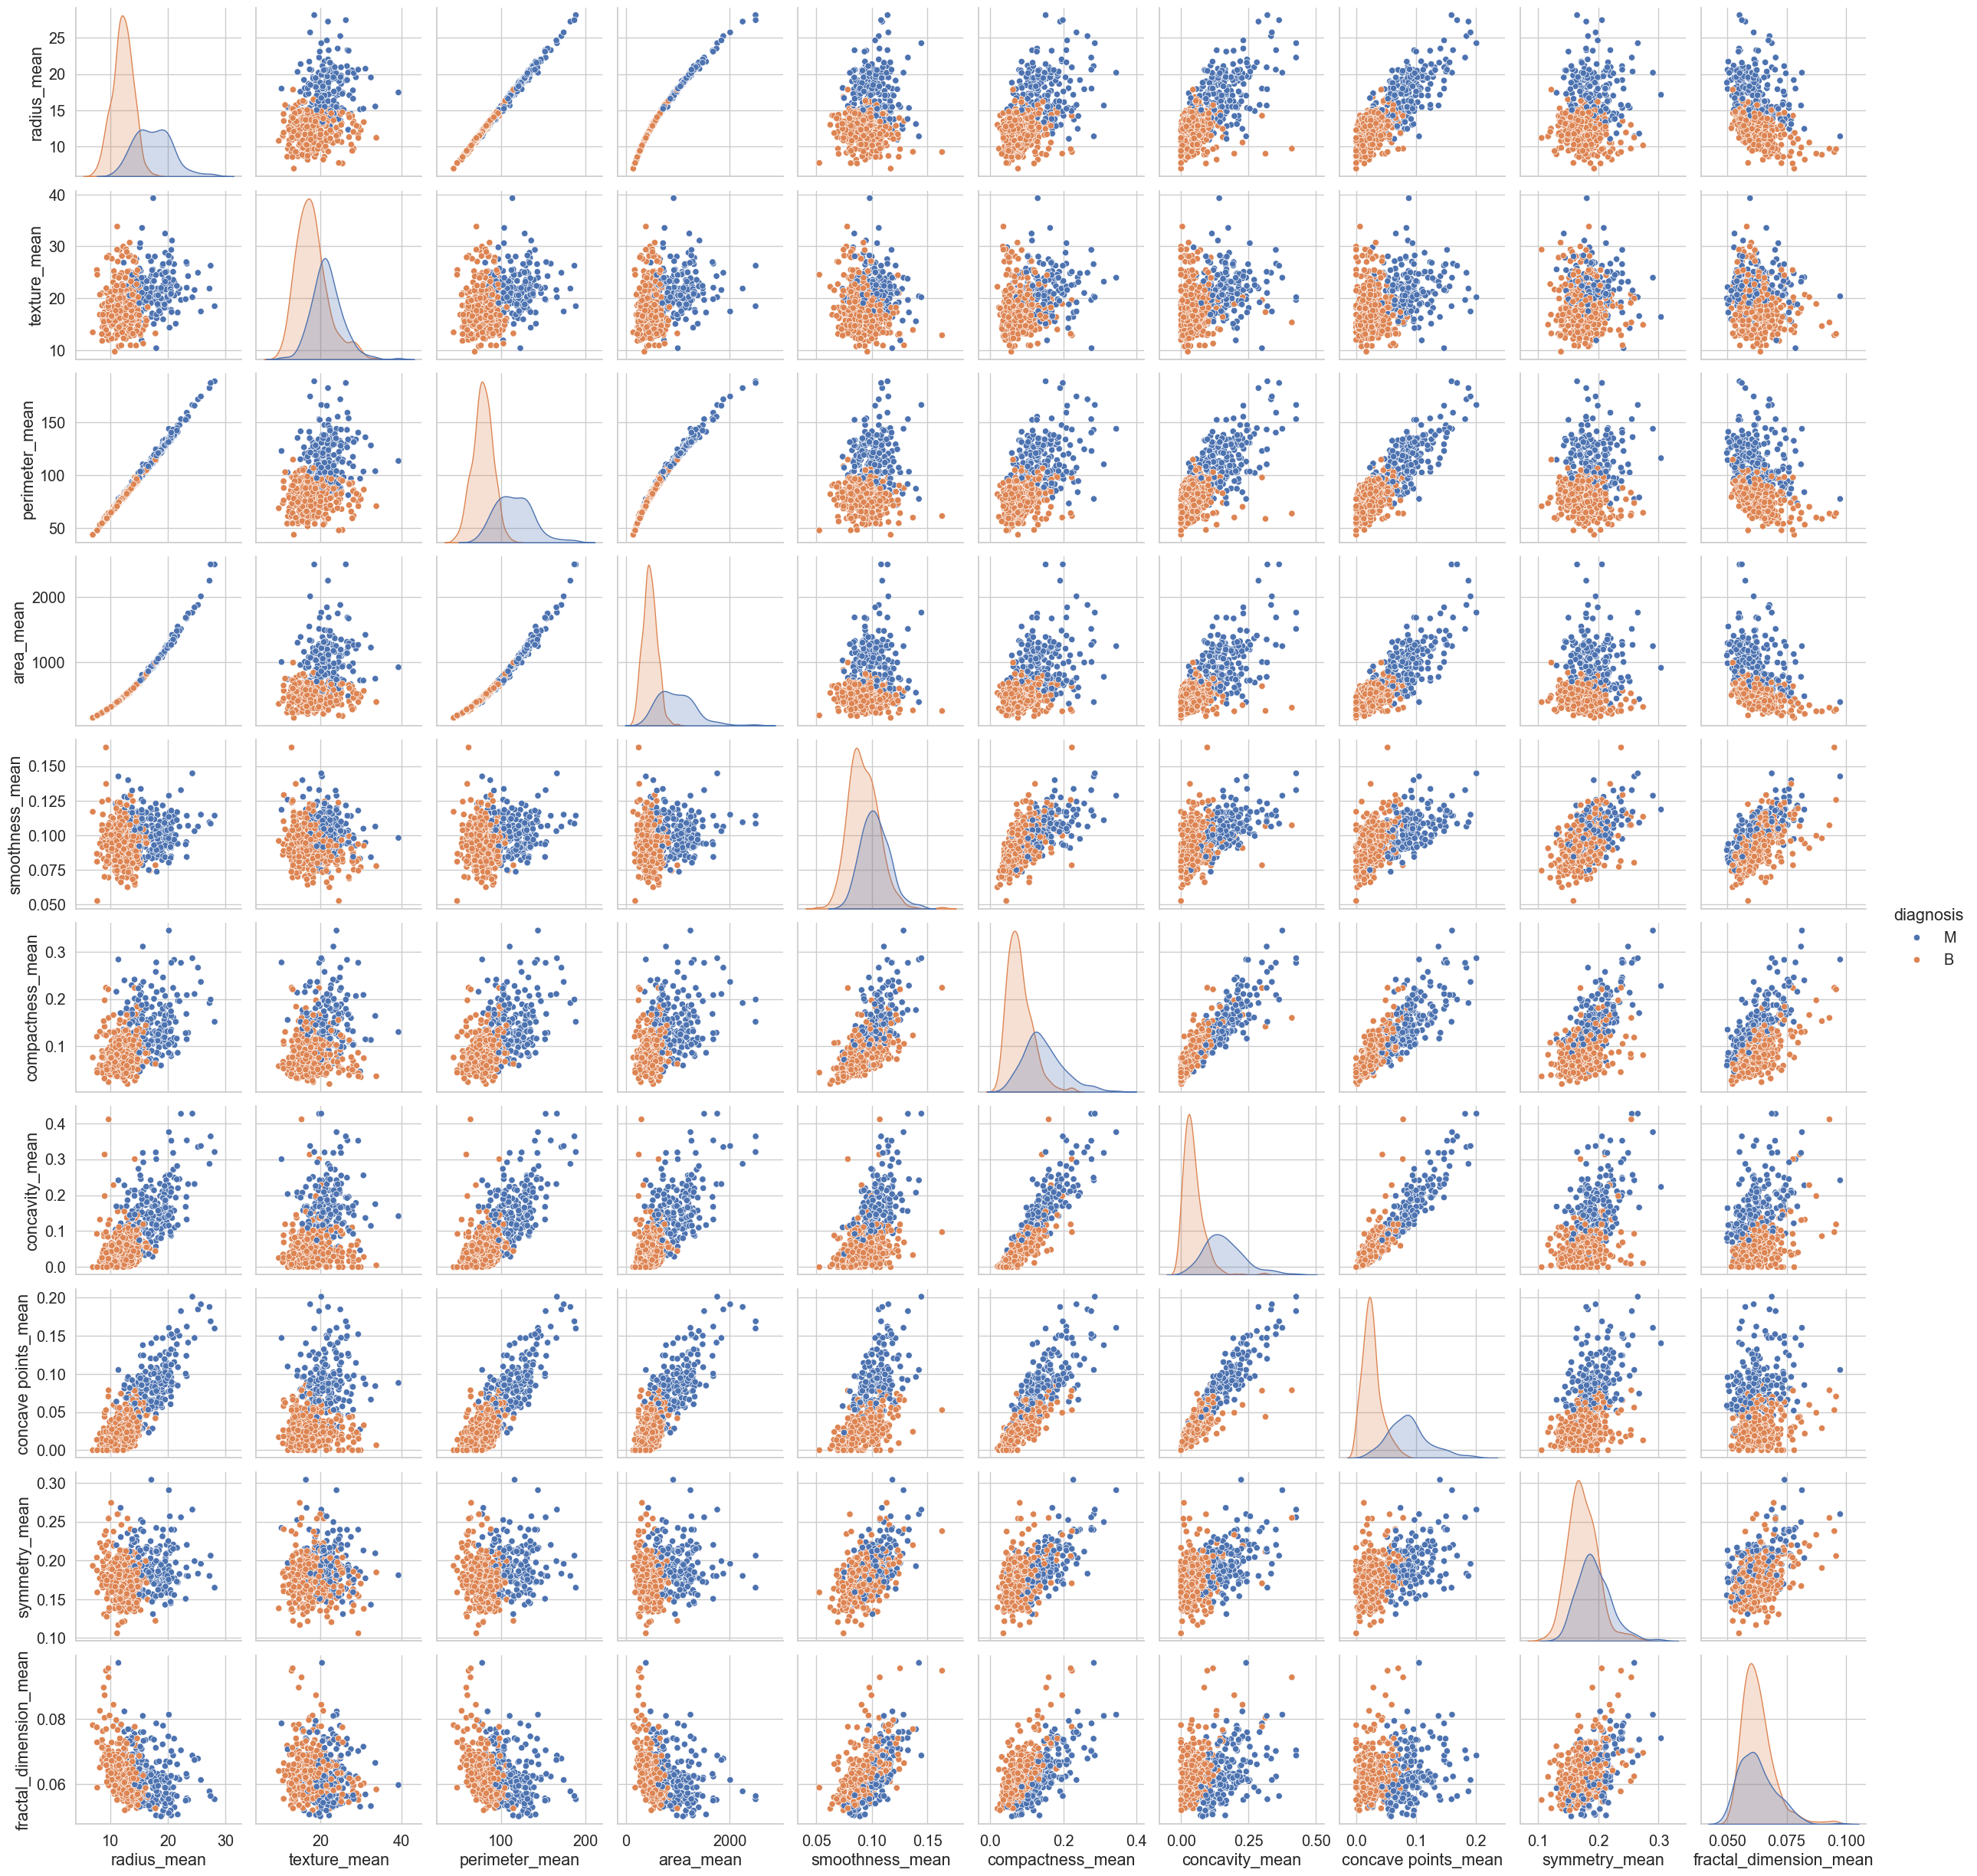

In [11]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis') # Plotting the matrix using the diagnosis column as a color legend

Existem alguns padrões interessantes visíveis. Por exemplo, os padrões quase perfeitamente lineares entre raio, perímetro e área indicam a presença de multicolinearidade entre essas variáveis. O que faz sentido, uma vez que se lembrarmos das fórmulas de perímetro e área, de matemática básica, elas dependem do valor do raio.

Outro conjunto de variáveis que possivelmente implicam em multicolinearidade são a concavidade, os pontos_côncavos e a compacidade.

Na próxima seção, geraremos uma matriz semelhante à anterior, mas desta vez exibindo as correlações entre as variáveis em vez de um gráfico de dispersão. Vamos descobrir se nossa hipótese sobre a multicolinearidade tem algum suporte estatístico.

# 2. As Variáveis
---
Como dito anteriormente, vamos dar uma olhada nas correlações entre nossas variáveis. Desta vez, porém, criaremos uma matriz de correlação com todas as variáveis (ou seja, as colunas "médias", as colunas "erros padrão", bem como as colunas "piores").

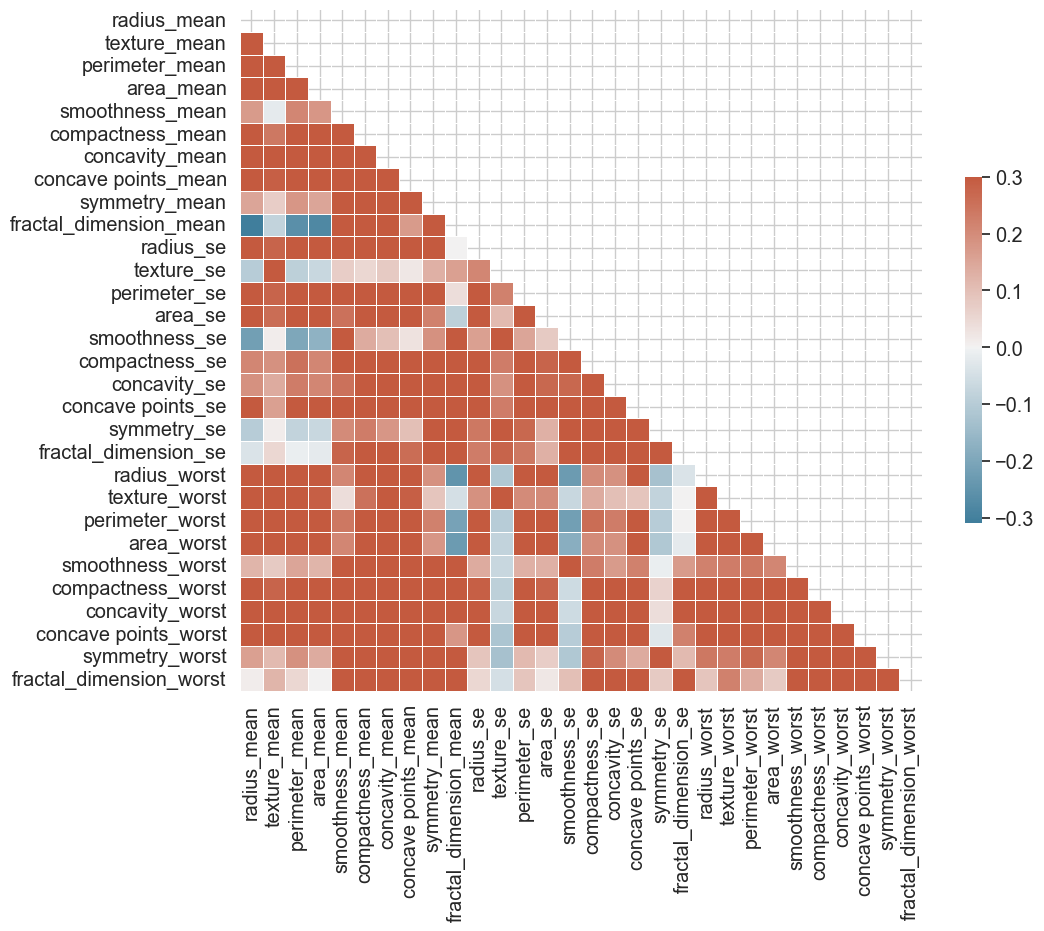

In [12]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Generate and visualize the correlation matrix
corr = numeric_df.corr().round(2)

# Code to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Olhando para a matriz, podemos verificar imediatamente a presença de multicolinearidade entre algumas de nossas variáveis. A multicolinearidade ocorre quando temos uma correlação muito alta entre as nossas features. Por exemplo, a coluna **radius_mean** tem uma correlação de 1 e 0,99 com as colunas **perimeter_mean** e **area_mean**, respectivamente. Provavelmente porque as três colunas contêm essencialmente a mesma informação, que é o tamanho físico da observação (a célula). Portanto, devemos escolher apenas uma das três colunas quando fizermos uma análise mais aprofundada.

Outro lugar onde a multicolinearidade é aparente é entre as colunas "médias" e a coluna "pior". Por exemplo, a coluna **radius_mean** tem uma correlação de 0,97 com a coluna **radius_worst**. Na verdade, cada um dos 10 atributos-chave exibe correlações muito altas (de 0,7 a 0,97) entre suas colunas "média" e "pior". Isso é inevitável, porque as colunas "piores" são essencialmente apenas um subconjunto das colunas "médias"; as colunas "piores" também são a "média" de alguns valores (os três maiores valores entre todas as observações). Portanto, acho que devemos descartar as colunas "piores" de nossa análise e focar apenas nas colunas "médias".

Resumindo, descartaremos todas as "piores" colunas de nosso conjunto de dados e escolheremos apenas um dos três atributos que descrevem o tamanho das células. Mas qual deve ser escolhido?

Vamos voltar rapidamente para a 6ª série e revisar um pouco de geometria. Se pensarmos em uma célula como tendo aproximadamente a forma de um círculo, então a fórmula para seu raio é, bem, seu raio, *r*. As fórmulas para seu perímetro e área são então **\\(2\pi r\\)** e **\\(\pi r^2\\)**, respectivamente. Como podemos ver, o **raio** de uma célula é o bloco de construção básico de seu tamanho. Portanto, acho razoável escolher **radius** como nosso atributo para representar o tamanho de uma célula.

Da mesma forma, parece haver multicolinearidade entre os atributos **compacidade**, **concavidade** e **pontos côncavos**. Assim como fizemos com os atributos de tamanho, devemos escolher apenas um desses três atributos que contém informações sobre a forma da célula. Acho que **compacidade** é um nome de atributo direto, então removerei os outros dois atributos.

Agora iremos em frente e descartaremos todas as colunas desnecessárias.

In [13]:
# deleting all worst columns"
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# next step, deleting all columns related with "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
df = df.drop(cols, axis=1)

# for last, deleting all columns related with "concavity" and "concave" attributes
cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']
df = df.drop(cols, axis=1)

# checking all columns that were left
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Vamos dar uma olhada na matriz de correlação mais uma vez, desta vez criada com nosso conjunto reduzido de variáveis.

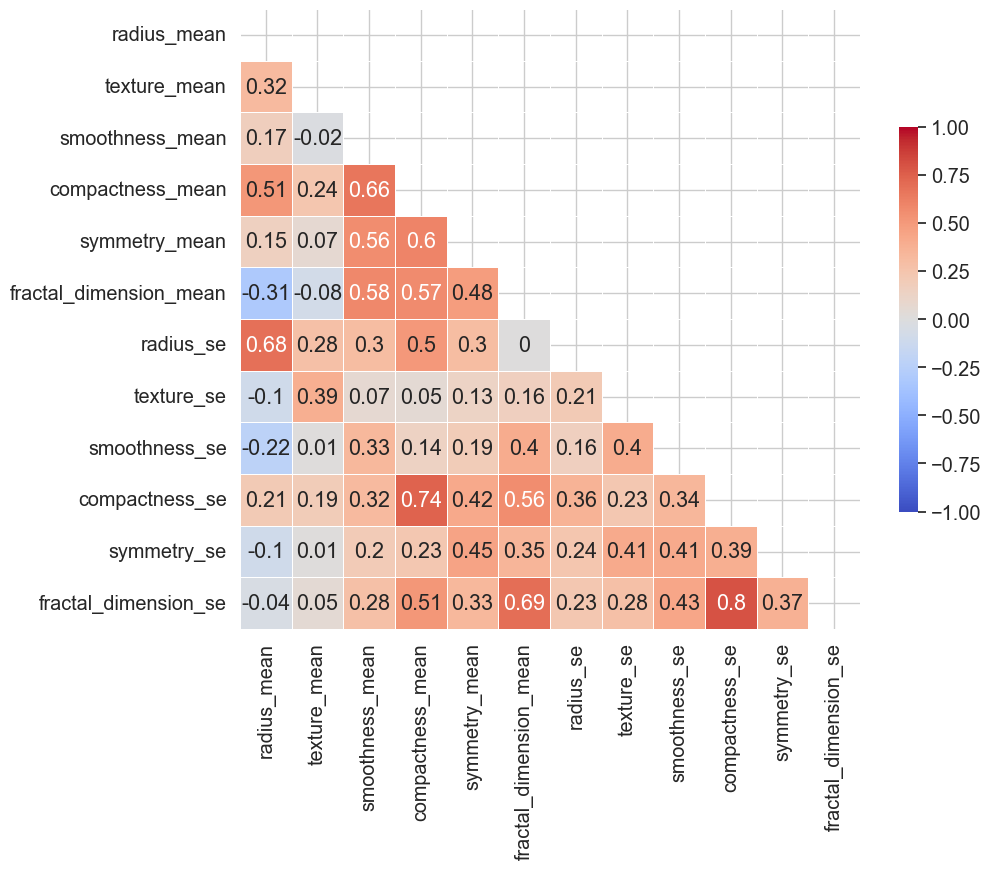

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix and round to two decimal places
corr = numeric_df.corr().round(2)

# Create a matrix of zeros with the same shape as the correlation matrix
mask = np.zeros_like(corr, dtype=bool)

# Mark the top of the correlation matrix as True for the mask
mask[np.triu_indices_from(mask)] = True

# Configure the Matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Show the graph
plt.show()

Agora já parece que temos menos correlação entre as features. O maior valor observado na nossa matriz triangular de correlações é entre compactness_se e fractal_dimension_se (correlação de 0.8). Vamos desenvolver o modelo e avaliar os resultados para fazer ajustes caso necessário.

# 3. O modelo
___

Finalmente chegou a hora de desenvolver nosso modelo! Começaremos dividindo nosso conjunto de dados em duas partes:

**1**:  um como conjunto de treinamento para o modelo;

**2**: outro como conjunto de teste para validar as previsões que o modelo fará.

Se omitirmos esta etapa, o modelo será treinado e testado no mesmo conjunto de dados e subestimará a taxa de erro real, fenômeno conhecido como **overfitting**. É como escrever um exame depois de dar uma olhada nas perguntas e respostas de antemão. Queremos garantir que nosso modelo realmente tenha poder preditivo e seja capaz de rotular com precisão os dados não vistos.

 Vamos definir o tamanho do teste para 0,3; ou seja, 70% dos dados serão atribuídos ao conjunto de treinamento e os 30% restantes serão usados como conjunto de teste. Para obter resultados consistentes, definiremos o parâmetro de estado aleatório para um valor de 42.

 OBSERVAÇÃO:
  - O parâmetro de estado aleatório, é um número que controla a aleatoriedade dos processos de amostragem e divisão dos dados. Ele é essencial para garantir a reprodutibilidade dos experimentos e resultados em aprendizado de máquina. Se você não especificar um random_state, a divisão pode ser diferente cada vez que você executar o código, o que pode afetar a avaliação de desempenho do seu modelo.

Vale ressaltar que antes de dividir os grupos entre treinamento e teste, temos de separar nossa target (variável dependente) das nossas features (variáveis independentes) para entrada no modelo.

In [15]:
# Split the data into training and testing sets
x = df.drop(['diagnosis'], axis = 1) #features = variaveis independentes
y = df['diagnosis'] #target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#treino: 70% e teste:30%


In [16]:
x_test

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,
87930,12.470,18.60,0.09965,0.10580,0.1925,0.06373,0.3961,1.0440,0.006953,0.019110,0.01782,0.003586
859575,18.940,21.31,0.09009,0.10290,0.1582,0.05461,0.7888,0.7975,0.004444,0.016520,0.01386,0.001698
8670,15.460,19.48,0.10920,0.12230,0.1931,0.05796,0.4743,0.7859,0.006240,0.014840,0.01397,0.002461
907915,12.400,17.68,0.10540,0.13160,0.1811,0.07102,0.1767,1.4600,0.010000,0.032950,0.02187,0.006005
921385,11.540,14.44,0.09984,0.11200,0.1818,0.06782,0.2784,1.7680,0.012150,0.041120,0.01840,0.005512
...,...,...,...,...,...,...,...,...,...,...,...,...
859487,12.780,16.49,0.09831,0.05234,0.1590,0.05653,0.2368,0.8732,0.007962,0.005612,0.02254,0.001906
921644,14.740,25.42,0.08275,0.07214,0.1840,0.05680,0.3031,1.3850,0.004775,0.011720,0.01870,0.002626
872608,9.904,18.06,0.09699,0.12940,0.1669,0.08116,0.4311,2.2610,0.012860,0.088080,0.03880,0.017920


In [17]:
x_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,
869931,13.740,17.91,0.07944,0.06376,0.1473,0.05580,0.2500,0.7574,0.002838,0.015920,0.01329,0.001976
865468,13.370,16.39,0.07115,0.07325,0.1422,0.05823,0.1639,1.1400,0.005919,0.032700,0.01208,0.004076
906564,14.690,13.98,0.10310,0.18360,0.2086,0.07406,0.5462,1.5110,0.009976,0.052440,0.02653,0.005444
875878,12.910,16.33,0.07941,0.05366,0.1829,0.05667,0.1942,0.9086,0.005298,0.015870,0.01853,0.002152
922576,13.620,23.23,0.09246,0.06747,0.1664,0.05801,0.3460,1.3360,0.005868,0.020990,0.02087,0.002583
...,...,...,...,...,...,...,...,...,...,...,...,...
859711,8.888,14.64,0.09783,0.15310,0.1902,0.08980,0.5262,0.8522,0.017210,0.093680,0.02541,0.021930
863031,11.640,18.33,0.11420,0.10170,0.1801,0.06520,0.3060,1.6570,0.008540,0.023100,0.01565,0.003840
8910721,14.290,16.82,0.06429,0.02675,0.1508,0.05376,0.1302,0.7198,0.003492,0.003710,0.01536,0.001381


Agora que dividimos nossos dados em conjuntos apropriados, vamos anotar a fórmula a ser usada para a regressão logística.

In [18]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



A fórmula inclui todas as variáveis que foram finalmente selecionadas no final da seção anterior. Agora, executaremos a regressão logística com esta fórmula e veremos os resultados.

Na regressão logística, usamos a distribuição binomial no parametro family, pois devido a natureza da target (0 ou 1) ser binária, estamos interessados em modelar a probabilidade de um dos dois possíveis resultados (maligno caso for 0, benigno caso for 1), o que se alinha com a distribuição binomial que descreve tais eventos binários.

In [19]:
# Run the model and report the results

model = smf.glm(formula=formula, data=x_train.join(y_train), family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -61.139
Date:                              Fri, 18 Oct 2024   Deviance:                       122.28
Time:                                      18:37:31   Pearson chi2:                     175.
No. Iterations:                                   8   Pseudo R-squ. (CS):             0.6377
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

Ótimo! Na próxima seção, alimentaremos os dados de teste para esse modelo para gerar previsões de rótulos. Em seguida, avaliaremos com que precisão o modelo previu os dados.

Notem como algumas variáveis são inúteis para o modelo - todas que tem um p-valor maior que 0.05 seriam inúteis (compactness_mean, fractal_dimension_mean, texture_se, smoothness_se, compactness_se, symmetry_se seriam inúteis)

A título de comparação, vamos fazer um modelo com todas essas variáveis e um outro sem essas variáveis

# 4.1. Modelo completo
___
Na seção anterior, desenvolvemos com sucesso um modelo de regressão logística.

Esse modelo pode pegar alguns dados não rotulados (rotúlos: B e M) e atribuir efetivamente a cada observação uma probabilidade variando de 0 a 1. Essa é a principal característica de um modelo de regressão logística. No entanto, para avaliarmos se as previsões são precisas, as previsões devem ser codificadas para que cada instância possa ser comparada diretamente com os rótulos nos dados de teste. Isto é, por exemplo, se uma das instâncias previstas, gerou uma probabilidade de 0.89, então devemos ser capazes de comparar este valor com os rotulos dos dados de teste, para avaliarmos a precisão do modelo.

Em nosso modelo, uma probabilidade de 1 corresponde à classe "Benigna", enquanto uma probabilidade de 0 corresponde à classe "Maligna". Portanto, podemos aplicar um valor limite de 0,5 às nossas previsões, atribuindo a todos os valores mais próximos de 0 um rótulo de "M" e atribuindo a todos os valores mais próximos de 1 um rótulo de "B".

Em resumo, o que queremos fazer é:

- 1- Previsão de Probabilidades:

  - O modelo de regressão logística gera uma probabilidade para cada instância.

  - Por exemplo, se para uma instância a probabilidade gerada for 0.89, isso significa que há 89% de chance de a instância ser classificada como "Benigna" (B).

- 2- Definição de um Limite (Threshold):

 - Comumente, utilizamos um limite de 0.5 para converter a probabilidade em uma previsão binária:

    - Probabilidade ≥ 0.5: A instância é prevista como "Benigna" (B).
    - Probabilidade < 0.5: A instância é prevista como "Maligna" (M).

- 3- Comparação com os Rótulos Reais:

  - Depois de converter a probabilidade em uma previsão binária, comparamos essa previsão com o rótulo real da instância nos dados de teste para avaliar a precisão do modelo.

Vamos agora aplicar o modelo nos dados de teste (somente nas variaveis independentes) para comparar as previsões obtidas com o y_test.

In [20]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(x_test) #nao estou passando o y de test
predictions

#0.99 -> 99% de chance de ser B -> portanto, 1% de chance de ser maligno
#0.3 -> 30% de chance de ser B -> portanto, 70% de chance de ser maligno

id
87930     0.867699
859575    0.000268
8670      0.026557
907915    0.990146
921385    0.999113
            ...   
859487    0.996259
921644    0.419173
872608    0.999992
91504     0.016895
884626    0.997646
Length: 171, dtype: float64

Observe como os valores acima são numéricos. Estas probabilidades devem ainda ser convertidas em valores nominais, isto é, nos nossos rotulos (B ou M). Vamos utilizar o valor limite, discutido acima para classificar os dados de acordo com os rótulos.

In [21]:

# if gratter than 0.5 then B
# if lower than 0.5 then M

predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal

['B',
 'M',
 'M',
 'B',
 'B',
 'M',
 'M',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'M',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'M',
 'B',
 'M',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'M',
 'M',
 'M',
 'B',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'M',
 'B',
 'B',
 'B',
 'M',
 'M',
 'B',
 'B',
 'M',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'M',
 'B',
 'B',
 'M',
 'M',
 'M',
 'M',
 'M',
 'B',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'M',
 'B',
 'M',
 'M',
 'B',
 'M',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'M',
 'B',
 'B',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'M',
 'M',
 'B',
 'B',
 'M',
 'M',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B',
 'M',
 'M',
 'B',
 'M',
 'B',
 'B',
 'M',
 'B',
 'M',
 'M',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'B',
 'M',
 'M',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'M',
 'B',
 'B'

Podemos confirmar que as probabilidades mais próximas de 0 foram rotuladas como "M", enquanto as mais próximas de 1 foram rotuladas como "B". Agora podemos avaliar a precisão de nossas previsões verificando o relatório de classificação e a matriz de confusão.

In [22]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

cfm = confusion_matrix(y_test, predictions_nominal)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal)
accuracy = accuracy_score(y_test, predictions_nominal)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')


Confusion Matrix: 
 [[103   5]
 [  3  60]] 

True Negative: 103
False Positive: 5
False Negative: 3
True Positive: 60
Balanced accuracy: 
 0.953042328042328 

Accuracy: 
 0.9532163742690059 

Sensitivity: 
 0.9523809523809523 

Especificidade: 
 0.9537037037037037 



Vamos relembrar o significado de algumas das métricas acima:

####**Resumo das Métricas**

- **Matriz de Confusão:** Fornece uma visão detalhada da performance do modelo, incluindo:

  - Verdadeiros negativos (TN)

  - Falsos positivos (FP)

  - Falsos negativos (FN)

  - Verdadeiros positivos (TP)

- **Acurácia Balanceada:** Média entre a sensibilidade e a especificidade, útil para conjuntos de dados desbalanceados.

- **Acurácia:** Proporção total de previsões corretas.

- **Sensibilidade (Recall):** Capacidade do modelo de identificar corretamente as instâncias da classe positiva.

- **Especificidade:** Capacidade do modelo de identificar corretamente as instâncias da classe negativa.

Portanto, nosso modelo rotulou com precisão 95,3% dos dados de teste. Este é apenas o começo no entanto. Poderíamos tentar aumentar ainda mais a precisão usando um algoritmo diferente da regressão logística ou tentar nosso modelo com um conjunto diferente de variáveis.



# 4.2. Modelo sem variáveis que não são importantes


Agora, lembra daquelas variáveis em que o p_value era maior que 0.05 quando avaliamos o modelo? Vamos desconsidera-las e vamos analisar o novo modelo a partir das variáveis restantes.

In [23]:
# Eliminating Unimportant Variables
cols2 = df.columns.drop(['diagnosis', 'compactness_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se'])
formula2 = 'diagnosis ~ ' + ' + '.join(cols2)
print(formula2, '\n')

# run new model
model2 = smf.glm(formula=formula2, data=x_train.join(y_train), family=sm.families.Binomial())
logistic_fit2 = model2.fit()
print(logistic_fit2.summary())

diagnosis ~ radius_mean + texture_mean + smoothness_mean + symmetry_mean + radius_se + fractal_dimension_se 

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      391
Model Family:                              Binomial   Df Model:                            6
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -68.310
Date:                              Fri, 18 Oct 2024   Deviance:                       136.62
Time:                                      18:37:31   Pearson chi2:                     183.
No. Iterations:                                   8   Pseudo R-squ. (CS):             0.6244
Covariance Type:                          nonrobust  

In [24]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

predictions2 = logistic_fit2.predict(x_test) #nao estou passando o y de test
predictions_nominal2 = [ "M" if x < 0.5 else "B" for x in predictions2]

cfm = confusion_matrix(y_test, predictions_nominal2)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal2)
accuracy = accuracy_score(y_test, predictions_nominal2)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0


print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)


print('Confusion Matrix: \n', cfm, '\n')
print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')

True Negative: 102
False Positive: 6
False Negative: 2
True Positive: 61
Confusion Matrix: 
 [[102   6]
 [  2  61]] 

Balanced accuracy: 
 0.9563492063492063 

Accuracy: 
 0.9532163742690059 

Sensitivity: 
 0.9682539682539683 

Especificidade: 
 0.9444444444444444 



Notem que nossas métricas continuam as mesmas, mas agora sem tantas variáveis. Ou seja, conseguimos um modelo tão bom quanto antes porém agora mais simples. Isto é um fator positivo e considerado de melhora para as previsões.

#Sumário
#### **Manipulação de dados:**

1.	Eliminar coluna(coluna_1) do dataset df:

  ```python
  df = df.drop(‘coluna_1', axis=axis)
  ```
- O parâmetro axis especifica que a operação deve ser feita ao longo das linhas ou  colunas. Para linhas use axis =0 e para colunas axis=1.


2.	Verificando o tipo de dados de cada coluna:

  ```python
  df.dtypes

  ```
3.	Filtrar colunas do dataframe df com tipo numérico usando numpy:
  ```python
  import numpy as np

  np.number
```

#### **Visualização de dados:**

4.	Scatter Plot Matriz
- Para visualizar o scatter plot entre as diferentes colunas do dataframe:

  ```python
  import seaborn as sns
  sns.pairplot(data=df[colunas_de_interesse], hue='coluna_parametro')
  ```
  - Parâmetros:
	  - data = dataframe somente com colunas a serem analisadas

    - hue = colorir de acordo com um parâmetro no caso ‘coluna_parametro'

#### **Cálculos Estatísticos:**
5. Matriz de Correlação

- Seleção de Colunas Numéricas: Seleciona colunas no DataFrame df que são de tipo numérico.

  ```python
  numeric_df = df.select_dtypes(include=[np.number])
  ```

-  Cálculo da Matriz de Correlação
```python
corr = numeric_df.corr().round(2)
```
  -	numeric_df.corr(): Calcula a matriz de correlação entre todas as colunas numéricas do DataFrame numeric_df.

- Criação da Máscara

  Criação de uma máscara que oculta a parte superior da matriz de correlação para evitar a duplicidade de informações.

  ```python
  mask = np.triu(np.ones_like(corr, dtype=bool)
  ```

  - np.ones_like(corr, dtype=bool): Cria uma matriz booleana (True/False) do mesmo formato que a matriz corr.

  - np.ones_like() é uma função do numpy que cria uma matriz de 1s com a mesma forma que outra matriz.
  - dtype=bool converte todos os 1s para True.

  - np.triu(): Seleciona a parte triangular superior da matriz.
o	np.triu() significa "triangular upper", ou seja, pega a parte superior da matriz incluindo a diagonal e define como True.

- Configuração da Figura do Matplotlib

  ```python
  f, ax = plt.subplots(figsize=(11, 9))
  ```
  - plt.subplots(figsize=(11, 9)): Cria uma figura (f) e um eixo (ax) com o tamanho especificado (11 x 9 polegadas).

  - figsize define o tamanho da figura em polegadas.

-  Definição do Colormap

  ```python
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  ```
  - sns.diverging_palette(230, 20, as_cmap=True): Cria um colormap divergente.

  - 230 e 20 são os pontos iniciais e finais da paleta de cores, que normalmente vão de azul (para valores negativos) a vermelho (para valores positivos), passando pelo branco para o zero.

  -	as_cmap=True indica que a saída deve ser um mapa de cores contínuo, não uma paleta de cores discreta.


  - Criação do Heatmap

  ```python
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}
  ```

    - sns.heatmap(): Gera um gráfico de calor (heatmap) da matriz de correlação.

    - corr: A matriz de correlação calculada.

    - mask=mask: Aplica a máscara para ocultar a parte superior da matriz.

    - cmap=cmap: Utiliza o colormap divergente que foi criado.

    - vmax=.3: Define o valor máximo da barra de cores. Aqui, valores acima de 0.3 terão a cor mais intensa.

    - center=0: Centraliza a barra de cores em torno de 0.

    - square=True: Garante que cada célula do heatmap seja quadrada.

    - linewidths=.5: Define a largura das linhas que separam as células no heatmap.
    
    -	cbar_kws={"shrink": .5}: Configura a barra de cores, ajustando seu tamanho para 50% do padrão.



#### **Machine Learning:**

6.	Model Training and Evaluation

-   Data Preparation:
  - Separação entre 70% para treino (x_train, y_train) e 30% para teste (x_test, y_test). O random_state=42 para garantir reprodutibilidade.

  ```python
  # x: df que contem todas variáveis independentes.

  x = df.drop(['coluna_target'], axis=1)  

  # y: df que contem a variável dependente.

  y = df[' coluna_target'']

  # separação entre teste e treinamento: o que define o tamanho é test_size

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
```

- Construção do Modelo:
```python
  # excluindo a coluna com a variável dependente
  cols = df.columns.drop('diagnosis')

  #construção da string para entrada no modelo no formato: ‘target ~ feature1 + feature2 + … + feature_n’

  formula = 'diagnosis ~ ' + ' + '.join(cols)
  print(formula, '\n')
  ```
- Fitando o Modelo e Avaliando:
  ```python
    # construção do modelo:

    model = smf.glm(formula=formula, data=x_train.join(y_train), family=sm.families.Binomial())

    # fitando o modelo para os dados de treino

    logistic_fit = model.fit()

    # exibindo resultado para avaliação

    print(logistic_fit.summary())
  ```

- Previsão dos dados de teste:

  ```python
  predictions = logistic_fit.predict(x_test)

  # Classificando o valor previsto das probabilidades de acordo com os rótulos,
  #vamos considerar como B e M, no caso de 1 e 0 respectivamente.

  predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]

  ```

- Matriz de Confusão:

  - Gera a matriz de confusão que compara as previsões do modelo (predictions_nominal ) com y_test:

  ```python
  cfm = confusion_matrix(y_test, predictions_nominal)
  ```
- Extração de Elementos da Matriz de Confusão:

  - tn (True Negative): Número de verdadeiros negativos.
  
  - fp (False Positive): Número de falsos positivos.
  
  - fn (False Negative): Número de falsos negativos.
  
  - tp (True Positive): Número de verdadeiros positivos.

  ```python
  tn = cfm[0][0]
  fp = cfm[0][1]
  fn = cfm[1][0]
  tp = cfm[1][1]
  ```

- Cálculo da Acurácia Balanceada:

  ```python
  balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal)
  accuracy = accuracy_score(y_test, predictions_nominal)
  ```

- Cálculo da Sensibilidade e Especificidade:

  ```python
  sensibilidade = tp / (tp + fn)
  especificidade = tn / (tn + fp)
  ```
#### **Resumo das Métricas**
•	**Matriz de Confusão:** Fornece uma visão detalhada da performance do modelo, incluindo:

  - Verdadeiros negativos (TN)

  - Falsos positivos (FP)
  - Falsos negativos (FN)
  - Verdadeiros positivos (TP)

  •	**Acurácia Balanceada:** Média entre a sensibilidade e a especificidade, útil para conjuntos de dados desbalanceados.

  •	**Acurácia:** Proporção total de previsões corretas.

  •	**Sensibilidade (Recall):** Capacidade do modelo de identificar corretamente as instâncias da classe positiva.

  •	**Especificidade:** Capacidade do modelo de identificar corretamente as instâncias da classe negativa.
